In [1]:
import numpy as np
import math
from random import seed
from random import random
from numba import jit


from functions import read_tsp_file
from functions import comp_shortest_path

In [2]:
T_start = 1000
T_end = 0.005
cooling_factor_arr = np.arange(0.1,0.99,0.01)
nMarkov = 10000
num_simulations = 10

coords = read_tsp_file("TSP-Configurations/a280.tsp")
dataset = "a280"
avg_cost = []
itr_arr = []

for cooling_factor in cooling_factor_arr:
    print("cooling factor : ",cooling_factor)
    mini_cost = []
    #print("\n")
    for run in range(num_simulations):
        #print("Simulation run :",run)
        itr, min_cost, optimal_list_cities,local_minima_arr = comp_shortest_path(T_start, T_end, cooling_factor, nMarkov, coords, dataset=dataset, save_data=False)
        mini_cost.append(min_cost)
        #print("Minimum route Cost : ",min_cost)
    avg_cost.append(np.mean(mini_cost))
    itr_arr.append(itr)
    print(avg_cost[-1])
    #print("\n")
    

cooling factor :  0.1
3994.2511558102656
cooling factor :  0.11
4113.516642000747
cooling factor :  0.12
4062.1235491742054
cooling factor :  0.13
4129.234373001711
cooling factor :  0.13999999999999999
3889.090072451655
cooling factor :  0.14999999999999997
3923.383908411767
cooling factor :  0.15999999999999998
3927.553502957787
cooling factor :  0.16999999999999998
3900.8262530334914
cooling factor :  0.17999999999999997
3715.1951332743192
cooling factor :  0.18999999999999995
3711.138965860496
cooling factor :  0.19999999999999996
3767.4921562720965
cooling factor :  0.20999999999999996
3786.4131800652663
cooling factor :  0.21999999999999995
3549.4495686014466
cooling factor :  0.22999999999999995
3531.27661590864
cooling factor :  0.23999999999999994
3608.749282469695
cooling factor :  0.24999999999999992
3623.6083289990356
cooling factor :  0.2599999999999999
3450.2780268031447
cooling factor :  0.2699999999999999
3456.917753864368
cooling factor :  0.2799999999999999
3539.37370

In [3]:
cooling_factor_arr_new = np.arange(0.1,0.99,0.01)
cooling_factor_arr_new = np.append(cooling_factor_arr_new,0.99)

avg_cost_new = np.copy(avg_cost)
avg_cost_new = np.append(avg_cost_new,2679.477483)

print(avg_cost_new)


[3994.25115581 4113.516642   4062.12354917 4129.234373   3889.09007245
 3923.38390841 3927.55350296 3900.82625303 3715.19513327 3711.13896586
 3767.49215627 3786.41318007 3549.4495686  3531.27661591 3608.74928247
 3623.608329   3450.2780268  3456.91775386 3539.37370814 3495.45632192
 3396.91269801 3426.81017745 3447.35827439 3353.18983922 3346.26321975
 3369.18915918 3393.96059395 3296.16107914 3290.15830741 3332.21266599
 3222.87576243 3242.04808528 3174.10479807 3217.49705107 3177.05254985
 3196.61537222 3192.2631215  3135.163036   3156.46304754 3138.69448223
 3136.29298767 3081.1781116  3080.53521502 3066.08550792 3053.55330298
 3045.8933609  3027.68489153 3038.04868739 3019.95847142 3017.44213362
 3029.5326157  3021.58123352 3046.57911976 2997.83314125 3002.06066822
 2971.30417497 2964.70034319 2959.16358012 2926.18345941 2937.94332901
 2944.28729319 2933.45508772 2942.18958103 2922.3951333  2892.68551163
 2907.57125797 2904.23016042 2892.80323012 2896.56348896 2913.61964126
 2890.

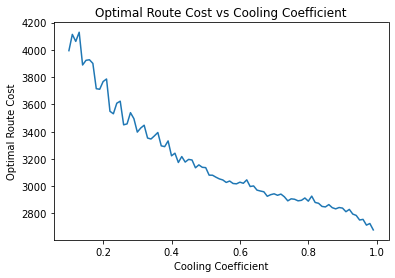

In [12]:
import matplotlib.pyplot as plt

plt.plot(cooling_factor_arr_new,avg_cost_new)
plt.title("Optimal Route Cost vs Cooling Coefficient")
plt.xlabel("Cooling Coefficient")
plt.ylabel("Optimal Route Cost")
plt.show()

[[ 102355.31308742 -167350.93578423   78773.67107058   -9793.37675023]
 [-167350.93578423  278942.64221912 -134597.96311598   17234.17514228]
 [  78773.67107058 -134597.96311598   67237.63338267   -9025.66912937]
 [  -9793.37675023   17234.17514228   -9025.66912937    1322.26560925]]
[319.93016908 528.15020801 259.30220474  36.3629703 ]


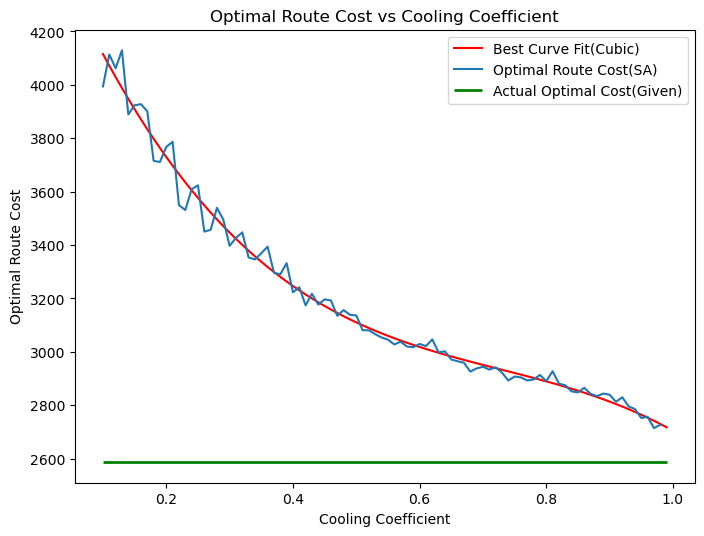

In [17]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=100)

def func(x, a, b, c,d):
    return a * x**3 + b*x**2 + c*x + d

xdata = cooling_factor_arr_new
ydata = avg_cost_new
popt, pcov = curve_fit(func, xdata, ydata)
print(pcov)
print(np.sqrt(np.diag(pcov)))
#plt.plot(xdata, func(xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f ,d=%5.3f' % tuple(popt))
plt.plot(xdata, func(xdata, *popt), 'r-',label='Best Curve Fit(Cubic)')
plt.plot(cooling_factor_arr,avg_cost,label="Optimal Route Cost(SA)")

plt.hlines(y=2587, xmin=0.1, xmax=0.99, linewidth=2, color='g',label="Actual Optimal Cost(Given)")
plt.legend()
plt.title("Optimal Route Cost vs Cooling Coefficient")
plt.xlabel("Cooling Coefficient")
plt.ylabel("Optimal Route Cost")
plt.show()
#plt.plot(cooling_factor,)
plt.show()

[[ 102355.31308742 -167350.93578423   78773.67107058   -9793.37675023]
 [-167350.93578423  278942.64221912 -134597.96311598   17234.17514228]
 [  78773.67107058 -134597.96311598   67237.63338267   -9025.66912937]
 [  -9793.37675023   17234.17514228   -9025.66912937    1322.26560925]]
[319.93016908 528.15020801 259.30220474  36.3629703 ]


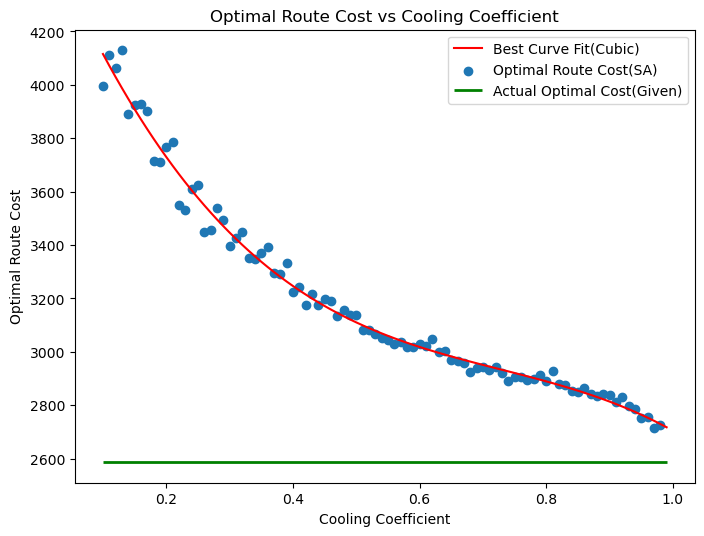

In [18]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=100)

def func(x, a, b, c,d):
    return a * x**3 + b*x**2 + c*x + d

xdata = cooling_factor_arr_new
ydata = avg_cost_new
popt, pcov = curve_fit(func, xdata, ydata)
print(pcov)
print(np.sqrt(np.diag(pcov)))

plt.plot(xdata, func(xdata, *popt), 'r-',label='Best Curve Fit(Cubic)')
plt.scatter(cooling_factor_arr,avg_cost,label="Optimal Route Cost(SA)")

plt.hlines(y=2587, xmin=0.1, xmax=0.99, linewidth=2, color='g',label="Actual Optimal Cost(Given)")
plt.legend()
plt.title("Optimal Route Cost vs Cooling Coefficient")
plt.xlabel("Cooling Coefficient")
plt.ylabel("Optimal Route Cost")
plt.show()
#plt.plot(xdata, func(xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f ,d=%5.3f' % tuple(popt))
